In [56]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [57]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 2)

In [58]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, dtype ="uint8")
val_labels = to_categorical(val_labels, dtype ="uint8")
test_labels = to_categorical(test_labels, dtype ="uint8")

In [59]:
train_images.shape

(48000, 28, 28)

In [60]:
train_images = train_images.reshape(-1,28,28,1)
val_images = val_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [61]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 62],
        [ 28],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  2],
        [ 61],
        [ 22],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [181],
        [221],
        [222],
        [ 64],
        [ 58],
        [109],
        [ 47],
        [ 11],
        [ 59],
        [108],
        [ 59],
        [ 49],
        [215],
        [200],
        [143],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [230],
        [218],
        [231],
        [225],
      

In [62]:
def intensity_scaling(train_images):
  return np.array(255*(train_images/255)**2,dtype='uint8')
train_images = intensity_scaling(train_images)

In [63]:
augmention = ImageDataGenerator(
        rotation_range=8,
        zoom_range = 0.0,
        width_shift_range=0.1, 
        height_shift_range=0.1
)
augmention.fit(train_images)

# Part 2

In [64]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [65]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

In [67]:
trained_model = model.fit(augmention.flow(train_images, train_labels, batch_size = 64),epochs=25,validation_data=(val_images,val_labels),shuffle=True)

Epoch 1/25
750/750 [==============================] - 24s 31ms/step - loss: 0.7978 - accuracy: 0.7591 - val_loss: 0.4211 - val_accuracy: 0.8522
Epoch 2/25
750/750 [==============================] - 23s 30ms/step - loss: 0.4487 - accuracy: 0.8330 - val_loss: 0.3627 - val_accuracy: 0.8622
Epoch 3/25
750/750 [==============================] - 22s 29ms/step - loss: 0.3876 - accuracy: 0.8554 - val_loss: 0.3085 - val_accuracy: 0.8859
Epoch 4/25
750/750 [==============================] - 22s 29ms/step - loss: 0.3520 - accuracy: 0.8700 - val_loss: 0.3182 - val_accuracy: 0.8869
Epoch 5/25
750/750 [==============================] - 22s 29ms/step - loss: 0.3272 - accuracy: 0.8792 - val_loss: 0.2719 - val_accuracy: 0.8984
Epoch 6/25
750/750 [==============================] - 22s 29ms/step - loss: 0.3130 - accuracy: 0.8829 - val_loss: 0.2828 - val_accuracy: 0.8903
Epoch 7/25
750/750 [==============================] - 21s 28ms/step - loss: 0.3038 - accuracy: 0.8870 - val_loss: 0.2570 - val_accuracy:

In [68]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2933 - accuracy: 0.9008


[0.29326891899108887, 0.9007999897003174]

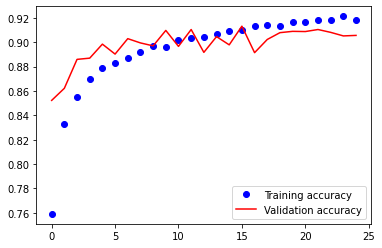

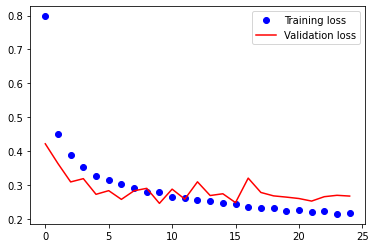

In [69]:
accuracy = trained_model.history['accuracy']
val_accuracy = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.legend()
plt.show()

In [70]:
model.save('Part2')

INFO:tensorflow:Assets written to: Part2/assets


# Part 3

In [71]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
model = Sequential()

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [72]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'auto', verbose = 0)
model_save =  ModelCheckpoint('model_weights.hdf5' , monitor = 'val_loss', save_best_only = True, mode = 'min')
reduce_lr =  ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0001)
model_modified = model.fit_generator(augmention.flow(train_images, train_labels, batch_size = 64),epochs=25,validation_data=(val_images,val_labels),steps_per_epoch=train_images.shape[0] // 64,callbacks=[early_stopping, model_save, reduce_lr],shuffle=True )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
750/750 [==============================] - 25s 32ms/step - loss: 0.6376 - accuracy: 0.7692 - val_loss: 0.4337 - val_accuracy: 0.8373
Epoch 2/25
750/750 [==============================] - 23s 30ms/step - loss: 0.4294 - accuracy: 0.8422 - val_loss: 0.3298 - val_accuracy: 0.8773
Epoch 3/25
750/750 [==============================] - 23s 31ms/step - loss: 0.3792 - accuracy: 0.8619 - val_loss: 0.4019 - val_accuracy: 0.8456
Epoch 4/25
750/750 [==============================] - 22s 29ms/step - loss: 0.3536 - accuracy: 0.8705 - val_loss: 0.2939 - val_accuracy: 0.8917
Epoch 5/25
750/750 [==============================] - 24s 32ms/step - loss: 0.3323 - accuracy: 0.8780 - val_loss: 0.2966 - val_accuracy: 0.8913
Epoch 6/25
750/750 [==============================] - 22s 30ms/step - loss: 0.3144 - accuracy: 0.8866 - val_loss: 0.2687 - val_accuracy: 0.9028
Epoch 7/25
750/750 [==============================] - 23s 31ms/step - loss: 0.3067 - accuracy: 0.8880 - val_loss: 0.2477 - val_accuracy:

In [74]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2702 - accuracy: 0.9014


[0.27021583914756775, 0.9014000296592712]

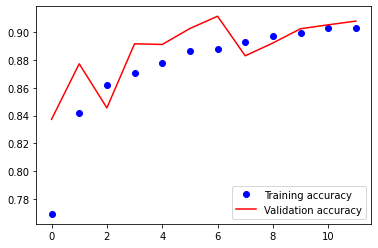

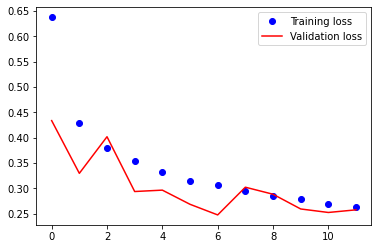

In [75]:
accuracy = model_modified.history['accuracy']
val_accuracy = model_modified.history['val_accuracy']
loss = model_modified.history['loss']
val_loss = model_modified.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.legend()
plt.show()

As seen above, the final model achieves almost similar accuracy in lesser number of epochs due to increased learning speed.